In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pylab as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
betta = np.random.uniform(-90, 90)
omega_x = np.random.uniform(0, 1)
omega_y = np.random.uniform(0, 1)
gamma = np.random.uniform(-90, 90)
x0 = np.array([[betta], [omega_x], [omega_y], [gamma]])
x0

array([[-15.83037535],
       [  0.96640505],
       [  0.43704334],
       [ 64.57685838]])

In [3]:
A_small = np.array([[-0.172, 0.0631, 0.998, 0.051], [-26.05, -2.749, -0.533, 0], [-4.337, -0.006, -0.301, 0], [0, 1, -0.0632, 0]])
A_small, A_small.shape

(array([[-1.720e-01,  6.310e-02,  9.980e-01,  5.100e-02],
        [-2.605e+01, -2.749e+00, -5.330e-01,  0.000e+00],
        [-4.337e+00, -6.000e-03, -3.010e-01,  0.000e+00],
        [ 0.000e+00,  1.000e+00, -6.320e-02,  0.000e+00]]), (4, 4))

In [4]:
B_small = np.array([[-0.034, 0], [-4.757, -18.644], [-3.07, 0.666], [0, 0]])
B_small, B_small.shape

(array([[ -0.034,   0.   ],
        [ -4.757, -18.644],
        [ -3.07 ,   0.666],
        [  0.   ,   0.   ]]), (4, 2))

In [5]:
A_big = np.array([[-0.152, 0.4226, 0.9063, 0.096], [-18.643, -1.06, -1.533, 0], [-1.757, -0.153, -0.136, 0], [0, 1, -0.4663, 0]])
A_big, A_big.shape

(array([[ -0.152 ,   0.4226,   0.9063,   0.096 ],
        [-18.643 ,  -1.06  ,  -1.533 ,   0.    ],
        [ -1.757 ,  -0.153 ,  -0.136 ,   0.    ],
        [  0.    ,   1.    ,  -0.4663,   0.    ]]), (4, 4))

In [6]:
B_big = np.array([[-0.032, 0], [-1.874, -8.966], [-1.46, 0.304], [0, 0]])
B_big, B_big.shape

(array([[-0.032,  0.   ],
        [-1.874, -8.966],
        [-1.46 ,  0.304],
        [ 0.   ,  0.   ]]), (4, 2))

In [7]:
Q = 10*np.eye(A_small.shape[1])
Q

array([[10.,  0.,  0.,  0.],
       [ 0., 10.,  0.,  0.],
       [ 0.,  0., 10.,  0.],
       [ 0.,  0.,  0., 10.]])

In [8]:
R = np.eye(B_small.shape[1])
R

array([[1., 0.],
       [0., 1.]])

In [9]:
'''scipy.linalg.solve_continuous_are(a, b, q, r)'''
S_small = la.solve_continuous_are(A_small, B_small, Q, R)
S_small

array([[ 1.08888243e+01, -6.05690953e-02,  5.15443571e-01,
         9.77594400e-02],
       [-6.05690953e-02,  1.59771136e-01, -7.54358181e-03,
         1.64485177e-01],
       [ 5.15443571e-01, -7.54358181e-03,  1.02316686e+00,
        -5.16400609e-02],
       [ 9.77594400e-02,  1.64485177e-01, -5.16400609e-02,
         1.01626037e+01]])

In [10]:
S_big = la.solve_continuous_are(A_big, B_big, Q, R)
S_big

array([[11.98640382, -0.0556329 ,  1.13296614, -0.10386127],
       [-0.0556329 ,  0.34320456, -0.0388765 ,  0.32318379],
       [ 1.13296614, -0.0388765 ,  2.31016159, -0.74021509],
       [-0.10386127,  0.32318379, -0.74021509,  9.64483837]])

In [11]:
u_small = -(np.linalg.inv(R)).dot(B_small.T).dot(S_small)#*x
u_small

array([[ 1.6645046 ,  0.73481315,  3.12276253,  0.62724482],
       [-1.47253563,  2.98379708, -0.82207167,  3.10105392]])

In [12]:
u_big = -(np.linalg.inv(R)).dot(B_big.T).dot(S_small)#*x
u_big

array([[ 0.98748351,  0.28645927,  1.49618114,  0.23597903],
       [-0.69975735,  1.43480125, -0.37867848,  1.49047267]])

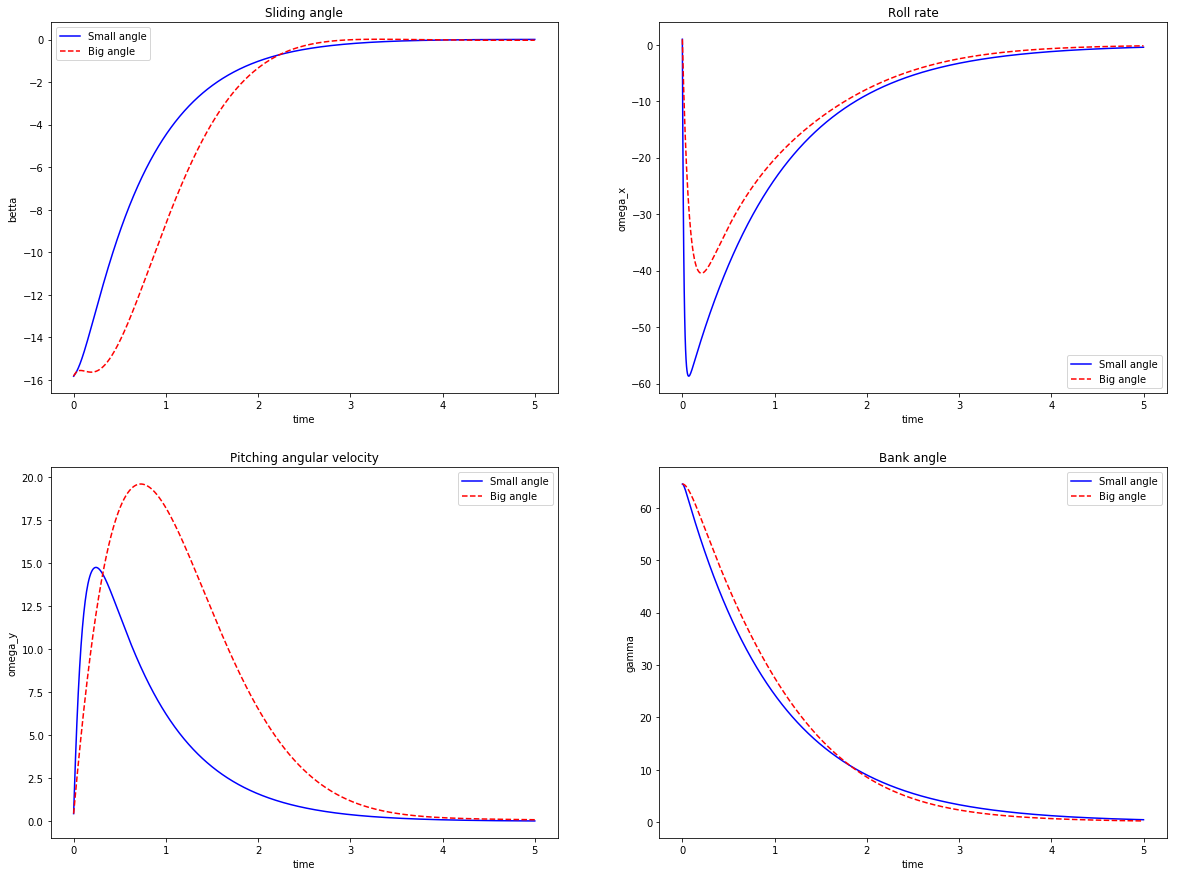

In [13]:
# function that returns dy/dt
def model_small(x, t):
    dxdt = A_small.dot(x) + B_small.dot(u_small).dot(x)
    return dxdt
def model_big(x, t):
    dxdt = A_big.dot(x) + B_big.dot(u_big).dot(x)
    return dxdt


# time points
t = np.linspace(0,5, 1000)

# solve ODE
x_small = odeint(model_small,np.squeeze(np.asarray(x0)),t)
x_big = odeint(model_big,np.squeeze(np.asarray(x0)),t)

# plot results
fig, ax =plt.subplots(nrows=2, ncols=2)
#betta - угол скольжения
ax[0][0].plot(t,x_small[..., 0], 'b',  label='Small angle')
ax[0][0].set_xlabel('time')
ax[0][0].set_ylabel('betta')
ax[0][0].set_title('Sliding angle')
ax[0][0].plot(t,x_big[..., 0], '--r', label='Big angle')
ax[0][0].legend(loc="best")
#omega_x - угловая скорость крена
ax[0][1].plot(t,x_small[..., 1], 'b',  label='Small angle')
ax[0][1].plot(t,x_big[..., 1], '--r', label='Big angle')
ax[0][1].legend(loc="best")
ax[0][1].set_xlabel('time')
ax[0][1].set_ylabel('omega_x')
ax[0][1].set_title('Roll rate')
#omega_y - угловая скорость тангажа
ax[1][0].plot(t,x_small[..., 2], 'b',  label='Small angle')
ax[1][0].plot(t,x_big[..., 2], '--r', label='Big angle')
ax[1][0].legend(loc="best")
ax[1][0].set_xlabel('time')
ax[1][0].set_ylabel('omega_y')
ax[1][0].set_title('Pitching angular velocity')
#gamma - угол крена
ax[1][1].plot(t,x_small[..., 3], 'b',  label='Small angle')
ax[1][1].plot(t,x_big[..., 3], '--r', label='Big angle')
ax[1][1].legend(loc="best")
ax[1][1].set_xlabel('time')
ax[1][1].set_ylabel('gamma')
ax[1][1].set_title('Bank angle')
fig.set_size_inches(20, 15)

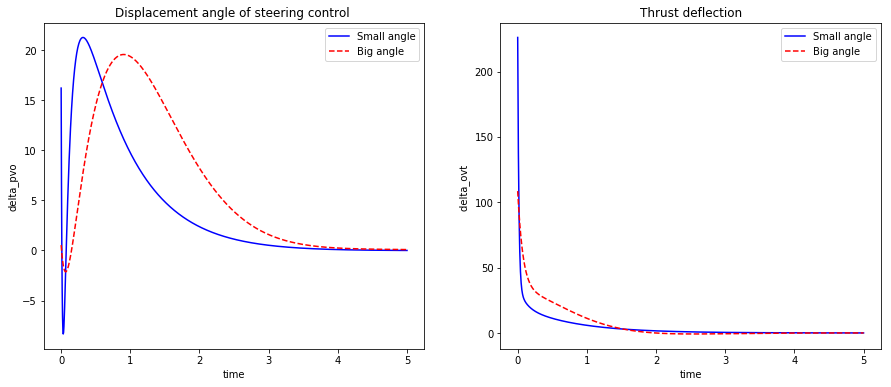

In [14]:
t = np.linspace(0,5, 1000)
fig, ax =plt.subplots(ncols=2)
#delta_pvo - угол отклонения рулей управления
ax[0].plot(t, u_small.dot(x_small.T)[0], 'b', label = 'Small angle')
ax[0].plot(t, u_big.dot(x_big.T)[0], '--r', label = 'Big angle')
ax[0].set_xlabel('time')
ax[0].set_ylabel('delta_pvo')
#ax[0].set_xlim(-.1, 5)
ax[0].legend(loc = 'best')
ax[0].set_title('Displacement angle of steering control ')
#delta_ovt - отклонение вектора тяги
ax[1].plot(t, u_small.dot(x_small.T)[1], 'b', label = 'Small angle')
ax[1].plot(t, u_big.dot(x_big.T)[1], '--r', label = 'Big angle')
ax[1].set_xlabel('time')
ax[1].set_ylabel('delta_ovt ')
#ax[1].set_xlim(-.1, 5)
ax[1].legend(loc = 'best')
ax[1].set_title('Thrust deflection')
fig.set_size_inches(15, 6)

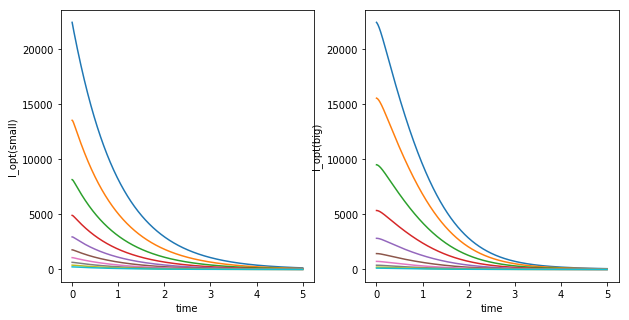

In [17]:
# time points
t = np.linspace(0,5, 1000)

# solve ODE
x_small = odeint(model_small,np.squeeze(np.asarray(x0)),t)
x_big = odeint(model_big,np.squeeze(np.asarray(x0)),t)

# plot results
fig, ax =plt.subplots(ncols=2)
ax[0].plot(t, 0.5*x_small.dot(S_small).dot(x_small.T)[..., ::100])
ax[0].set_xlabel('time')
ax[0].set_ylabel('I_opt(small)')
ax[1].plot(t, 0.5*x_big.dot(S_small).dot(x_big.T)[..., ::100])
ax[1].set_xlabel('time')
ax[1].set_ylabel('I_opt(big)')
fig.set_size_inches(10, 5)